# Lab 1

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import csv
import scipy.stats as st
from scipy.optimize import minimize
import math

## Problem 1

### Question 1

In [106]:
def randpair(mu_x, sigma_x, alpha, beta, sigma_y_x):
    X = np.random.normal(mu_x, sigma_x)
    Y = np.random.normal((alpha + beta * X), sigma_y_x)
    
    return (X, Y)

### Question 2

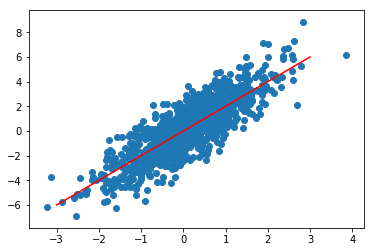

In [112]:
n = 10**3

pairs = [(randpair(0, 1, 0, 2, 1.25)) for x in range(0, n)]
x = np.linspace(-3,3)
y = 0 + 2 * x

plt.plot(x, y, color="r")

plt.scatter(np.array(pairs)[...,0], np.array(pairs)[...,1])
plt.show()

### Question 3

$$Pr(\vec{S}|\hat{\alpha},\hat{\beta},\hat{\sigma_{Y|X}}) = Pr(\vec{X},\vec{Y}|\hat{\alpha},\hat{\beta},\hat{\sigma_{Y|X}})$$
$$Pr(\hat{Y}|\vec{X},\hat{\alpha},\hat{\beta},\hat{\sigma})*Pr(\vec{X}|\hat{\alpha},\hat{\beta},\hat{\sigma})$$

Because the second part of the formula is constant it can be left out, and we can say:
$$\log L(\vec{Y}|\vec{X}, \hat{\alpha},\hat{\beta},\hat{\sigma})$$

### Question 4

We need to make the assumption that $x_{i+1}$ is independent from $x_i$. If we make this assumption we can say:
$$\log L(\vec{Y}|\vec{X}, \hat{\alpha},\hat{\beta},\hat{\sigma}) = \sum_i logL(y_i|x_i,\alpha,\beta,\sigma)$$

### Question 5

In [4]:
def loglikelihood_lrm(alpha, beta, sigma_y, sample):
    result = 0
    
    for i in range(len(sample)):
        mu = alpha + (beta * sample[i][0])
        
        result += np.log(1/(np.sqrt(2*np.pi*sigma_y**2))) - ((sample[i][1] - mu)**2)/(2*sigma_y**2)
    
    return result

print(loglikelihood_lrm(0, 2, 1.25, pairs))

-1609.6372799


### Question 6

In [120]:
def fit_lrm2(sample):
    alpha = 0
    beta = 0
    sigma_y = 0
    lll = []
    parameters = []
    
    for i in range (0, 1000):
        parameters.append(np.random.uniform(0, 2, 3))
        lll.append(loglikelihood_lrm(parameters[i][0], parameters[i][1], parameters[i][2], pairs))
    
    return lll, parameters

### Question 7

In [6]:
lll, parameters = fit_lrm2(pairs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
index = lll.index(max(lll))
print(parameters[index])

[ 0.0386048   1.90677366  1.23279011]


The original values are 0, 2, 1.25. So none of my values have a difference bigger then 0.2.

In [8]:
def fit_lrm(sample):
    optres = minimize(lambda tup: -loglikelihood_lrm(*tup, sample=sample), (0, 0, 1), bounds=((None, None), (None, None), (0.001, None)))
    return optres.x

parameter = fit_lrm(pairs)

### Question 8

In [9]:
def calc_mean(x):
    return sum(x) / len(x)


def standard_deviation(x):
    square = 0
    mean = calc_mean(x)
    
    for i in x:
        square += (i - mean)**2 
    
    return np.sqrt(square / len(x))

In [10]:
X = [i[0] for i in pairs]

mu_x = calc_mean(X)
sigma_x = standard_deviation(X)
alpha = parameter [0]
beta = parameter[1]
sigma_y = parameter[2]

In [11]:
n = 10**3
N = 10**3
samples = []

for i in range (0, N):
    samples.append([(randpair(mu_x, sigma_x, alpha, beta, sigma_y)) for x in range(0, n)])

In [12]:
estimations = []

for i in range(0, N):
    estimations.append(fit_lrm(samples[i]))

In [13]:
def percentile(values, alpha):
    values = np.sort(values)
    k = alpha * (len(values) - 1)
    kceil = math.ceil(k)
    kfloor = math.floor(k)
    
    return ((values[kfloor] * (kceil - k)) + (values[kceil] * (k - kfloor))) 

In [14]:
alphas = np.array(estimations)[...,0]
betas = np.array(estimations)[...,1]
sigmas = np.array(estimations)[...,2]
alpha_mean = calc_mean(alphas)
beta_mean = calc_mean(betas)
sigma_mean = calc_mean(sigmas)

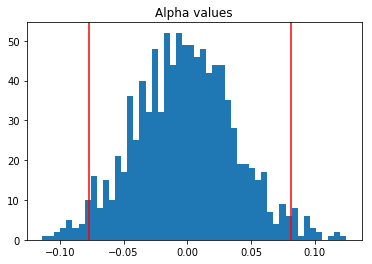

0.0815349241604
-0.0770035912078


In [15]:
uppera = percentile(alphas, 0.025)
lowera = percentile(alphas, 0.975)
plt.axvline(uppera, color="r")
plt.axvline(lowera, color="r")
plt.hist(alphas, 50)
plt.title("Alpha values")
plt.show()
print(lowera)
print(uppera)

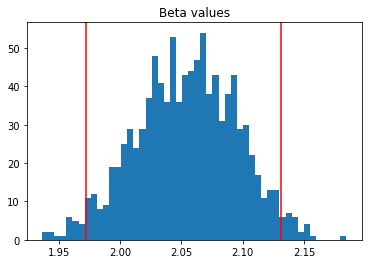

2.13078354494
1.97214347295


In [16]:
upperb = percentile(betas, 0.025)
lowerb = percentile(betas, 0.975)
plt.axvline(upperb, color="r")
plt.axvline(lowerb, color="r")
plt.hist(betas, 50)
plt.title("Beta values")
plt.show()
print(lowerb)
print(upperb)

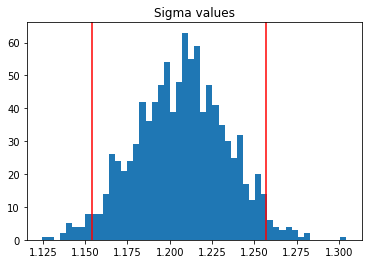

1.25672483739
1.15394522847


In [17]:
uppers = percentile(sigmas, 0.025)
lowers = percentile(sigmas, 0.975)
plt.axvline(uppers, color="r")
plt.axvline(lowers, color="r")
plt.hist(sigmas, 50)
plt.title("Sigma values")
plt.show()
print(lowers)
print(uppers)

No a slope of $\beta=0$ is not plausible it is not in the range of the confidence interval.

### Question 9

In [18]:
n = 3
N = 10**3
samples = []

for i in range (0, N):
    samples.append([(randpair(mu_x, sigma_x, alpha, beta, sigma_y)) for x in range(0, n)])

estimations = []

for i in range(0, N):
    estimations.append(fit_lrm(samples[i]))
    
betas = np.array(estimations)[...,1]

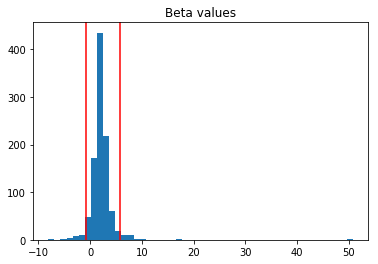

In [19]:
upper = percentile(betas, 0.025)
lower = percentile(betas, 0.975)
plt.axvline(upper, color="r")
plt.axvline(lower, color="r")
plt.hist(betas, 50)
plt.title("Beta values")
plt.show()

Yes this time it is possible because it is in the range of the confidence interval. 

We only fit on three values of alpha beta and sigma. therefor the range is not correct.

### Question 10

In [20]:
def bootstrap_lrm(sample, n=100, N=1000):
    bootstrap_sample_idx = np.random.choice(len(sample), n, replace=True)  
    
    bootstrap_sample = [sample[i] for i in bootstrap_sample_idx]
    
    parameter = fit_lrm(bootstrap_sample)

    return parameter

In [21]:
bootstrap_par = []

for i in range(0, 100):
    bootstrap_par.append(bootstrap_lrm(pairs))
    
alphas = np.array(bootstrap_par)[...,0]
betas = np.array(bootstrap_par)[...,1]
sigmas = np.array(bootstrap_par)[...,2]

buppera = percentile(alphas, 0.025)
blowera = percentile(alphas, 0.975)
bupperb = percentile(betas, 0.025)
blowerb = percentile(betas, 0.975)
buppers = percentile(sigmas, 0.025)
blowers = percentile(sigmas, 0.975)

In [22]:
print("Non bootstrap (lower-upper-mean)")
print(blowera)
print(buppera)
print(calc_mean(alphas))
print()
print(blowerb)
print(bupperb)
print(calc_mean(betas))
print()
print(blowers)
print(buppers)
print(calc_mean(sigmas))
print()

print("Bootstrap (lower-upper-mean)")
print(lowera)
print(uppera)
print(alpha_mean)
print()
print(lowerb)
print(upperb)
print(beta_mean)
print()
print(lowers)
print(uppers)
print(sigma_mean)

Non bootstrap (lower-upper-mean)
0.274310037609
-0.208816702255
0.0128106571902

2.28675255852
1.81227617226
2.05839843729

1.36573746458
1.02718862218
1.19002570236

Bootstrap (lower-upper-mean)
0.0815349241604
-0.0770035912078
-0.00169657153515

2.13078354494
1.97214347295
2.05437202889

1.25672483739
1.15394522847
1.20701894644


So they correspond fairly well!

### Question 11

The relation between x and i is $\mu_i=\alpha + \beta * X_i$. If $\beta$ is zero we would multiply $X_i$ with 0 so it would become zero. Therefor it won't be of any help with predicting $y_i$ and we don't know the $\mu$.

### Question 12


In [23]:
def variance(sample):
    return 1/len(sample) * np.sum(sample**2-calc_mean(sample)**2)

In [24]:
print("Variance Y")
variance_y = variance(np.array(pairs)[...,1]) 
print(variance_y)

Variance Y
5.56790616578


In [25]:
alpha = 0
beta = 2

print("Variance Y-(a+b*X)")
variance_residuals = variance(np.array(pairs)[...,1] - (alpha + beta * np.array(pairs)[...,0]))
print(variance_residuals)

Variance Y-(a+b*X)
1.46110528667


In [46]:
reduction = (variance_y - variance_residuals) / variance_y * 100
print("Goodness of fit in %")
print(reduction)

Goodness of fit in %
73.7584427041


### Question 13

In [41]:
beta = -2

variance_residual2 = variance(np.array(pairs)[...,1] - (alpha + beta * np.array(pairs)[...,0]))
reduction = (variance_y - variance_residual2) / variance_y * 100
print("Goodness of fit with beta -2")
print(reduction)

Goodness of fit with beta -2
-213.688657501


The variance now goes up because we have a negative beta.

### Question 14

If we increase the slope from -2 to -3, the goodness of fit will be lower cause it is 'further' away from the real value. Alpha is more directly controlling the goodness of fit because this term is added up to the product of beta and X.

### Question 15

In [53]:
def ppmcoeff(sample):
    X = np.array(sample)[...,0]
    Y = np.array(sample)[...,1]
    
    return (np.sum((X*Y))-n*calc_mean(X)*calc_mean(Y))/(len(X)*np.std(X)*np.std(Y))

print("r=")
print(ppmcoeff(pairs))
print("r**2=")
print(ppmcoeff(pairs)**2)

r=
0.859822557981
r**2=
0.739294831213


$r^2$ is very close to our Goodness of fit of 73,75%

We report r because then we can see the difference between negative and non negative values.

### Question 16

1. 0% 

2. 100%

3. $R^2$ will decrease

## Problem 2

### Question 1

In [145]:
def time_series(mu, sigma, n):
    d = np.random.normal(mu, sigma, n)
    s = [d[0]]
    for i in range(1, len(d)):
        s.append(s[i-1]+d[i])
        
    return s    
    
n = 10**2
time_serie = time_series(1, 2, n) 

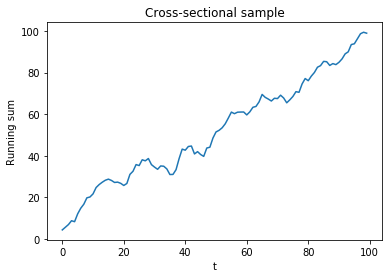

In [146]:
plt.plot(time_serie)
plt.xlabel("t")
plt.ylabel("Running sum")
plt.title("Cross-sectional sample")
plt.show()

### Question 2

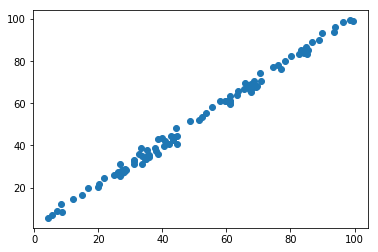

In [147]:
st = np.delete(time_serie, 0)
st_1 = np.delete(time_serie, len(time_serie)-1)

plt.scatter(st_1, st)
plt.show()

### Question 3

In [165]:
x = np.arange(len(time_serie))
pairs = [(x[i], time_serie[i]) for i in range(0, len(time_serie))]

lll, parameters = fit_lrm2(pairs)
index = lll.index(max(lll))
print(parameters[index])

[ 0.99610464  0.94901899  1.99360697]


We would expect an alpha of 0 and a beta of 1.

It is wrong to fit the parameters because in this case $S_i$ is depending on $S_{i-1}$

### Question 4


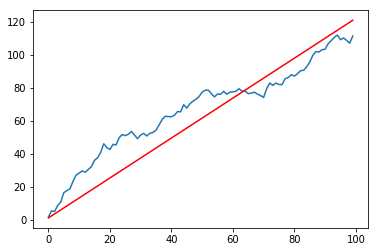

In [144]:
y =  parameters[index][0] + parameters[index][1] * x

plt.plot(time_serie)
plt.plot(x, y, color='red')
plt.legend()
plt.show()

Although that the sigma is actually quite the same as the correct value of 2 we can say that if it wasn't correct. It would have to do with the fact that the values aren't independent ($S_i$ is depending on $S_{i-1}$). If an error occured in one point it will occur in every point. 

### Question 5
We can estimate sigma by measuring the differences between $S_i$ and $S_i - 1$ and calculate the standarddeviation of this.


In [169]:
difference = [time_serie[i] - time_serie[i-1] for i in range(1, len(time_serie) -1 )]

sigma = np.std(difference)
print(sigma)

1.78136830268


### Question 6
